In [55]:
import requests
import pandas as pd

## Задание 1
Обязательная часть
Будем парсить страницу со свежеми новостям на habr.com/ru/all/.

Вам необходимо собирать только те статьи, в которых встречается хотя бы одно требуемое ключевое слово. Эти слова определяем в начале кода в переменной, например:

KEYWORDS = ['python', 'парсинг']

Поиск вести по всей доступной preview-информации (это информация, доступная непосредственно с текущей страницы).

В итоге должен формироваться датафрейм вида: <дата> - <заголовок> - <ссылка>

In [15]:
from bs4 import BeautifulSoup

In [14]:
res = 'habr.com/ru/all/'
KEYWORDS = ['python', 'парсинг']

In [30]:
req = requests.get('https://habr.com/ru/all/')
soup = BeautifulSoup(req.text, 'html.parser')
posts = soup.find_all('article', class_='post')

In [31]:
for post in posts:
    post_id = post.parent.attrs.get('id')
    if not post_id:
        continue
    post_id = int(post_id.split('_')[-1])
    hubs = post.find_all('a', class_='hub-link')
    all_posts = []
    for hub in hubs:
            hub_lower = hub.text.lower()
           
            if any([hub_lower in desired for desired in KEYWORDS]):
                title_element = post.find('a', class_='post__title_link')
                time_ = post.find('span', class_='post__time')
                all_posts = (time_.text, title_element.text, title_element.attrs.get('href'))
                print(all_posts)
                

('сегодня в 11:07', 'Классические задачи Computer Science на языке Python. Обзор книги', 'https://habr.com/ru/company/piter/blog/533902/')


## Задание 2.
Обязательная часть
Написать скрипт, который будет проверять список e-mail адресов на утечку при помощи сервиса Avast Hack Ckeck. Список email-ов задаем переменной в начале кода:
EMAIL = [xxx@x.ru, yyy@y.com]

В итоге должен формироваться датафрейм со столбцами: <почта> - <дата утечки> - <источник утечки> - <описание утечки>

Подсказка: сервис работает при помощи "скрытого" API. Внимательно изучите post-запросы.

In [38]:
EMAIL = ['xxx@x.ru', 'yyy@y.com']
URL = 'https://www.avast.com/hackcheck/'

'<!DOCTYPE html>\n\n  <html lang="en" class="no-js">\n  <head>\n    \n<script type="text/javascript" src="https://cdn.cookielaw.org/consent/b680e9a8-3d45-4e4a-998f-7d05f89e4486/OtAutoBlock.js" ></script>\n<script src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" data-document-language="true" type="text/javascript" charset="UTF-8" data-domain-script="b680e9a8-3d45-4e4a-998f-7d05f89e4486" ></script>\n<script type="text/javascript">\nfunction OptanonWrapper() { }\n</script>\n\n    <meta charset="utf-8">\n    \n<script>\n    /*! Declare GTM dataLayer */\n    window.dataLayer = window.dataLayer || [];\n      \n    /*! Dimensions to dataLayer */\n    (function(){\n        var dataObj = {\n            \'contentLocale\': \'en-ww\',\n            \'pageName\': \'en-ww | hackcheck\',\n            \'pageId\': \'2642a855299d70cc5f044def3fb7411b\'\n        };\n        var contentGroup = \'Consumer\';\n        if (contentGroup != \'\') {\n            dataObj.contentGroup = contentGroup;\n 
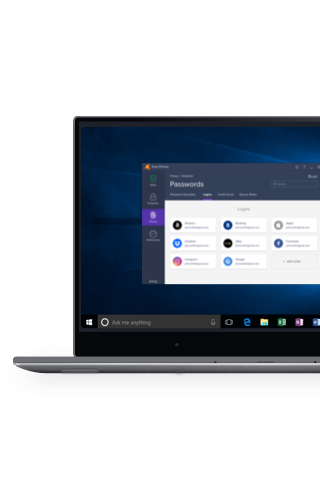
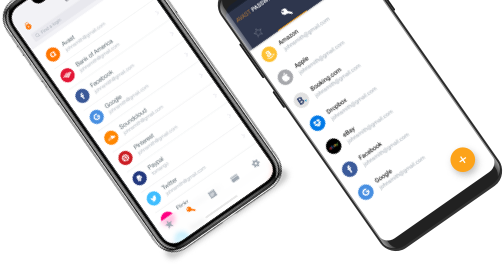

In [45]:
res = requests.get(URL)
res.text

In [59]:
k = requests.post(URL, 
              json = {"emailAddresses": EMAIL},
              headers = {"Vaar-Version": "0", "Vaar-Header-App-Product":  "hackcheck-web-avast"})
k.text

'<html>\r\n<head><title>405 Not Allowed</title></head>\r\n<body>\r\n<center><h1>405 Not Allowed</h1></center>\r\n<hr><center>nginx</center>\r\n</body>\r\n</html>\r\n'